# LC-MS: All Features Neg 


In [9]:
import pandas as pd
import numpy as np
import os
import openpyxl

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.stats import zscore, entropy, f_oneway
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.ensemble import IsolationForest

%matplotlib inline

In [10]:
# set the directory 
os.chdir('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results')

In [11]:
# Define the color palette for the sample types
sample_type_palette = {'Must': '#482677FF', 'PostAF': '#238A8DFF','PostMLF': '#74D055FF'}

# 1. Load data

In [12]:
# order
samples = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/FGCZ data/Order_34707_orderitem.csv')

# Extract the list of sample names
sample_names = samples['Sample Name'].tolist()

# Create a new dataframe 'sample_md' with selected column
sample_md = samples[['Sample Name']].copy()
# Split 'Sample Name' into new columns
sample_md[['sample_type', 'year', 'plot']] = sample_md['Sample Name'].str.split('_', expand=True)
sample_md.head()

,Sample Name,sample_type,year,plot
0,PostMLF_2021_Plot14,PostMLF,2021,Plot14
1,PostMLF_2021_Plot9,PostMLF,2021,Plot9
2,PostMLF_2021_Plot15,PostMLF,2021,Plot15
3,PostMLF_2021_Plot12,PostMLF,2021,Plot12
4,PostMLF_2021_Plot17,PostMLF,2021,Plot17


In [13]:
# Get the raw data
file_path = "/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/FGCZ data/p32837_o34707_Lena_RPMetabolomics_ALL_features_POS.xlsx"

# Read only the 'Area_Stats' sheet
df = pd.read_excel(file_path, sheet_name="Area_Stats")

# Fill empty 'Name' values with 'MW_' + corresponding 'Calc. MW' value
df['Name'] = df['Name'].fillna(df['Calc. MW'].apply(lambda x: f"MW_{x}" if pd.notna(x) else "MW_Unknown"))


## SUBSET TO NORMMALIZED SAMPLES 
# Identify 'Norm. Area' columns that correspond to samples in the list
matching_columns = [col for col in df.columns if any(sample in col for sample in sample_names)]
# Create a mapping to rename columns by extracting only the sample name
rename_dict = {col: next(sample for sample in sample_names if sample in col) for col in matching_columns}
# Select relevant columns and rename them
df = df[['Name'] + matching_columns].rename(columns=rename_dict)

# Set 'Name' as the index
df.set_index('Name', inplace=True)

df.head()

,Must_2023_Plot20,Must_2023_Plot19,Must_2023_Plot14,Must_2023_Plot17,Must_2023_Plot4,Must_2023_Plot9,Must_2023_Plot5,Must_2023_Plot12,Must_2023_Plot13,Must_2023_Plot15,...,PostMLF_2023_Plot4,PostMLF_2023_Plot15,PostMLF_2023_Plot5,PostMLF_2023_Plot20,PostMLF_2023_Plot17,PostMLF_2023_Plot13,PostMLF_2023_Plot14,PostMLF_2023_Plot19,PostMLF_2023_Plot9,PostMLF_2023_Plot12
Name,,,,,,,,,,,,,,,,,,,,,
MW_150.02783,3.393633e+08,3.409840e+08,3.574713e+08,4.094805e+08,3.621635e+08,3.741400e+08,3.060564e+07,3.160788e+08,3.947708e+08,4.389316e+08,...,4.817876e+08,3.935938e+08,5.168420e+08,4.489065e+08,3.986494e+08,4.132504e+08,6.061189e+08,3.952914e+08,5.593264e+08,4.315676e+08
MW_168.03836,1.150592e+08,1.052894e+08,1.233122e+08,1.200429e+08,1.085894e+08,1.075748e+08,1.352049e+07,1.046502e+08,1.309658e+08,1.387322e+08,...,1.577158e+08,1.282894e+08,1.641127e+08,1.597561e+08,1.417255e+08,1.467779e+08,2.168822e+06,1.448849e+08,1.951365e+08,1.461857e+08
MW_218.01896,2.590821e+08,3.684843e+08,2.328199e+08,2.430189e+08,3.107337e+08,3.148723e+08,6.546339e+07,2.332166e+08,3.350915e+08,2.534381e+08,...,4.208066e+07,8.653881e+07,6.236946e+07,6.914756e+07,1.254820e+08,2.180300e+07,1.085393e+08,2.981520e+07,7.898615e+07,4.153041e+07
MW_140.00503,2.301897e+05,2.884511e+05,2.098478e+05,1.418250e+05,1.527791e+05,1.417379e+05,1.183226e+05,2.395605e+05,2.997310e+05,3.212304e+05,...,1.982150e+06,1.290139e+06,3.421547e+06,1.954598e+06,5.319129e+05,1.034943e+06,5.792018e+05,1.119744e+06,5.680902e+05,1.061720e+06
MW_189.97182,7.373848e+08,7.358825e+08,6.574382e+08,7.195172e+08,7.668514e+08,7.965024e+08,7.599738e+08,7.544738e+08,6.831125e+08,7.536285e+08,...,9.095932e+08,8.094849e+08,1.011924e+09,7.908102e+08,7.169030e+08,8.348489e+08,1.087321e+09,7.907046e+08,1.048445e+09,8.918962e+08


In [14]:
## MERGE samples with metadata
df = df.T  # Transpose so samples are rows, features are columns
df.index.name = 'Sample Name'

# Merge metadata with metabolomics data
df_wMetadata = sample_md.merge(df, on='Sample Name')

df_wMetadata.head()

,Sample Name,sample_type,year,plot,MW_150.02783,MW_168.03836,MW_218.01896,MW_140.00503,MW_189.97182,MW_148.94526,...,α-Aspartylphenylalanine,α-Aspartylphenylalanine,α-Dehydrobiotin,α-Lactose,α-Methylbiotin,γ-L-glutaminyl-4-hydroxybenzene,γ-L-glutaminyl-4-hydroxybenzene,γ-L-glutamyl-L-leucine,γ-L-glutamyl-L-leucine,γ-Linolenic acid ethyl ester
0,PostMLF_2021_Plot14,PostMLF,2021,Plot14,3.267070e+08,1.006385e+08,9.265423e+06,1.080183e+06,7.141925e+08,1.330524e+08,...,240014.912736,1.592495e+06,357891.879452,1.584873e+07,184009.655108,173300.936331,304419.424183,2.942738e+06,9.131287e+05,288076.697774
1,PostMLF_2021_Plot14,PostMLF,2021,Plot14,4.733217e+08,1.458016e+08,1.342342e+07,1.564931e+06,1.034697e+09,1.927616e+08,...,347725.248090,2.307151e+06,518501.292912,2.296109e+07,266586.780980,251072.362101,441032.261665,4.263337e+06,1.322909e+06,417355.488709
2,PostMLF_2021_Plot9,PostMLF,2021,Plot9,3.702837e+08,1.045707e+08,5.961614e+06,1.081757e+06,7.484024e+08,1.371457e+08,...,282992.735625,1.088131e+06,291369.274649,1.109202e+07,181405.321707,292493.753687,581785.153408,4.535252e+06,9.707833e+05,292898.417198
3,PostMLF_2021_Plot9,PostMLF,2021,Plot9,5.048350e+08,1.425690e+08,8.127907e+06,1.474838e+06,1.020352e+09,1.869808e+08,...,385824.813830,1.483529e+06,397245.165671,1.512257e+07,247323.219520,398778.250662,793190.496593,6.183243e+06,1.323540e+06,399329.958194
4,PostMLF_2021_Plot15,PostMLF,2021,Plot15,3.317243e+08,9.594815e+07,1.346382e+07,1.759323e+06,6.937063e+08,1.279858e+08,...,194428.520517,9.079510e+05,340448.426340,1.187128e+07,167968.221729,171926.121499,269871.915047,3.152840e+06,1.071859e+07,302235.725304


In [15]:
df_wMetadata.shape

(104, 6209)

In [16]:
# Sum up duplicated Columns - CHECK if this is correct

metadata_columns = ['Sample Name', 'sample_type', 'year', 'plot']

# Separate metadata and data columns
metadata = df_wMetadata[metadata_columns]
data = df_wMetadata.drop(columns=metadata_columns)

# Sum up duplicate columns in the data part
data_summed = data.groupby(data.columns, axis=1).sum()

# Combine metadata and summed data
df_wMetadata = pd.concat([metadata, data_summed], axis=1)

df_wMetadata.shape

/scratch/lfloerl/tmpdata/ipykernel_2193325/401779589.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data_summed = data.groupby(data.columns, axis=1).sum()


(104, 5796)

### Alpha Diversity 
> check before normalizing 

#### Shannon Entropy

In [17]:
# Shannon entropy calculation
def shannon_entropy(values):
    """Calculate Shannon entropy for a given array of values."""
    # Normalize the values to get probabilities
    value_counts = values.value_counts(normalize=True)
    return entropy(value_counts)

# Function to apply Shannon entropy to the dataframe
def shannon_diversity_df(df):
    """Calculate Shannon Diversity for each column in a DataFrame."""
    shannon_diversity_values = {}
    for column in df.columns:
        shannon_diversity_values[column] = shannon_entropy(df[column])
    return pd.Series(shannon_diversity_values)

In [18]:
 # Apply Shannon entropy calculation to the collapsed data
shannon_diversity_results = df_wMetadata.apply(shannon_entropy, axis=1)

# Add the Shannon diversity values to a new dataframe with 'Sample Type' and 'Year'
shannon_diversity_df = pd.DataFrame({
    'Sample Type': df_wMetadata['sample_type'],  # Assuming 'sample_type' is a column
    'Year': df_wMetadata['year'],  # Assuming 'year' is a column
    'Shannon Diversity': shannon_diversity_results
})

In [19]:
# Group by 'Year' and 'Sample Type' for Shannon index
shannon_grouped = shannon_diversity_df.groupby(['Year', 'Sample Type'])['Shannon Diversity']

# Extract values for each group
group_postMLF_2023_shannon = shannon_grouped.get_group(('2023', 'PostMLF'))
group_postMLF_2022_shannon = shannon_grouped.get_group(('2022', 'PostMLF'))
group_postMLF_2021_shannon = shannon_grouped.get_group(('2021', 'PostMLF'))

# Perform ANOVA tests
print('SHANNON postMLF ANOVAS')
anova_result = f_oneway(group_postMLF_2023_shannon, group_postMLF_2022_shannon)
print("ANOVA 2023 vs 2022 p-value:", anova_result.pvalue)

anova_result = f_oneway(group_postMLF_2023_shannon, group_postMLF_2021_shannon)
print("ANOVA 2023 vs 2021 p-value:", anova_result.pvalue)

anova_result = f_oneway(group_postMLF_2022_shannon, group_postMLF_2021_shannon)
print("ANOVA 2022 vs 2021 p-value:", anova_result.pvalue)

SHANNON postMLF ANOVAS
ANOVA 2023 vs 2022 p-value: 0.004521320337794704
ANOVA 2023 vs 2021 p-value: 0.11651867917340805
ANOVA 2022 vs 2021 p-value: 0.3197868796260403


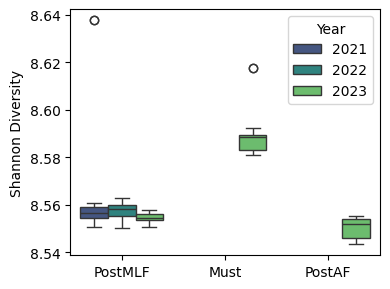

In [20]:
# Plot box plots
plt.figure(figsize=(4, 3))
sns.boxplot(data=shannon_diversity_df, x='Sample Type', y='Shannon Diversity', hue='Year', dodge=True, palette="viridis")
plt.title('')
plt.xlabel('')
plt.ylabel('Shannon Diversity')
plt.legend(title='Year')
plt.tight_layout() 
plt.show()

#### Richness

In [21]:
def richness(df):
    """Calculate richness (number of unique values) for each row in the DataFrame."""
    return df.apply(lambda x: x.nunique(), axis=1)

In [22]:
# Calculate richness for each sample (row)
richness_values = richness(df_wMetadata.iloc[:, 3:])

# Create a DataFrame with richness values
richness_df = pd.DataFrame(richness_values, columns=['Richness']).reset_index()

# Extract 'Sample Type' and 'Year' from the index or metadata columns
richness_df['Sample Type'] = df_wMetadata['sample_type'].values
richness_df['Year'] = df_wMetadata['year'].values

In [23]:
richness_grouped = richness_df.groupby(['Year', 'Sample Type'])['Richness']

# Extract values for each group
group_postMLF_2023_values = richness_grouped.get_group(('2023', 'PostMLF'))
group_postMLF_2022_values = richness_grouped.get_group(('2022', 'PostMLF'))
group_postMLF_2021_values = richness_grouped.get_group(('2021', 'PostMLF'))

# Perform ANOVA tests
print('RICHNESS postMLF ANOVAS')
anova_result = f_oneway(group_postMLF_2023_values, group_postMLF_2022_values)
print("ANOVA 2023 vs 2022 p-value:", anova_result.pvalue)
anova_result = f_oneway(group_postMLF_2023_values, group_postMLF_2021_values)
print("ANOVA 2023 vs 2021 p-value:", anova_result.pvalue)
anova_result = f_oneway(group_postMLF_2022_values, group_postMLF_2021_values)
print("ANOVA 2022 vs 2021 p-value:", anova_result.pvalue)

RICHNESS postMLF ANOVAS
ANOVA 2023 vs 2022 p-value: 0.0010394319058549747
ANOVA 2023 vs 2021 p-value: 0.12119186424931319
ANOVA 2022 vs 2021 p-value: 0.35798381951487757


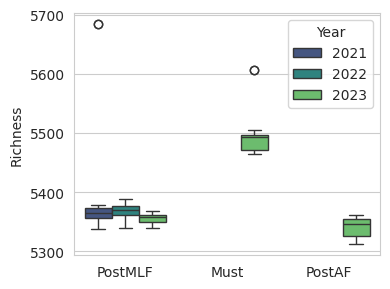

In [24]:
# Plot box plots
sns.set_style(style="whitegrid")
plt.figure(figsize=(4, 3))
sns.boxplot(data=richness_df, x='Sample Type', y='Richness', hue='Year', dodge=True, palette="viridis")
plt.title('')
plt.xlabel('')
plt.ylabel('Richness')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

### Normalize & Transform Data

1. Log Transformation to reduce skewness.
2. Pareto/Auto-scaling (Z-score normalization) for better comparison.

In [25]:
df_wMetadata.iloc[:, 4:] = np.log1p(df_wMetadata.iloc[:, 4:])  # Log transform
scaler = StandardScaler()
df_wMetadata.iloc[:, 4:] = scaler.fit_transform(df_wMetadata.iloc[:, 4:])

df_wMetadata.set_index('Sample Name', inplace=True)

In [26]:
df_wMetadata.shape

(104, 5795)

### Remove outliers

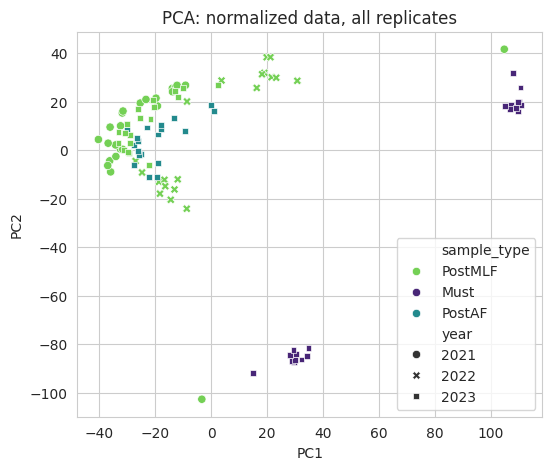

In [27]:
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(df_wMetadata.iloc[:, 3:])

df_pca = df_wMetadata[['sample_type', 'year', 'plot']].copy()
df_pca['PC1'], df_pca['PC2'] = pca_scores[:, 0], pca_scores[:, 1]

sample_type_palette = {'Must': '#482677FF', 'PostAF': '#238A8DFF','PostMLF': '#74D055FF'}

plt.figure(figsize=(6,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='sample_type', style='year', palette=sample_type_palette)
plt.title('PCA: normalized data, all replicates')
plt.show()


The Post-MLF 2021 samples appear to be outliers - we apply an Isolation Forest to clear this up

> Alternative: Apply Isolation Forest on PCA Scores? 

In [28]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(df_wMetadata.iloc[:, 4:])  # Fit on normalized data

# Remove outliers (label = -1)
df_wMetadata_cleaned = df_wMetadata[outlier_labels == 1]
df_wMetadata_cleaned.shape

(98, 5795)

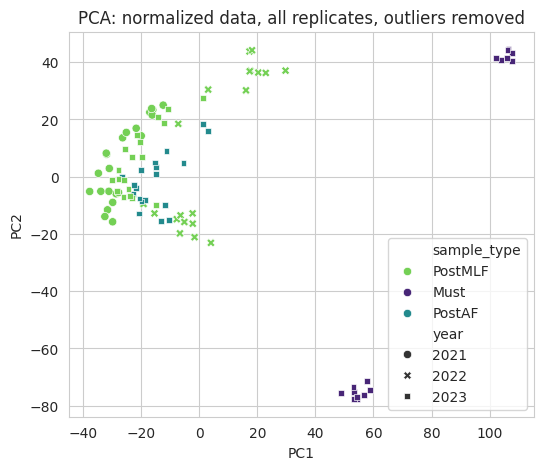

In [29]:
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(df_wMetadata_cleaned.iloc[:, 3:])

df_pca = df_wMetadata_cleaned[['sample_type', 'year', 'plot']].copy()
df_pca['PC1'], df_pca['PC2'] = pca_scores[:, 0], pca_scores[:, 1]

plt.figure(figsize=(6,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='sample_type', style='year', palette = sample_type_palette)
plt.title('PCA: normalized data, all replicates, outliers removed')
plt.show()


### Collapse Replicates

In [30]:
# Group by the index (sample name) and calculate the median for numerical columns
df_median = df_wMetadata_cleaned.iloc[:, 3:].groupby(df_wMetadata_cleaned.index).median()

# If you want to retain the metadata columns (which are categorical), you can take the first occurrence for each sample
df_metadata = df_wMetadata_cleaned.groupby(df_wMetadata_cleaned.index).first()[['sample_type', 'year', 'plot']]

# Merge the median values with the metadata
df_wMetadata_cleaned_collapsed = df_metadata.join(df_median)

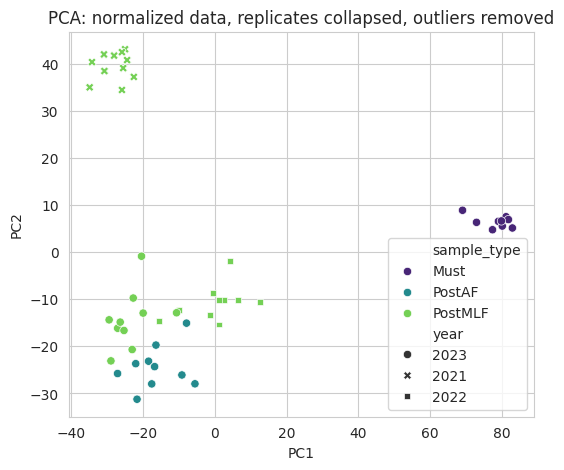

In [31]:
# Perform PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(df_wMetadata_cleaned_collapsed.iloc[:, 3:])

# Create a DataFrame for the PCA results
df_pca = df_wMetadata_cleaned_collapsed[['sample_type', 'year', 'plot']].copy()
df_pca['PC1'], df_pca['PC2'] = pca_scores[:, 0], pca_scores[:, 1]

# Plot PCA with custom color palette for sample type
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='sample_type', style='year', palette=sample_type_palette)
plt.title('PCA: normalized data, replicates collapsed, outliers removed')
plt.show()

In [32]:
# save
df_wMetadata_cleaned_collapsed.to_csv('Pos_All_OutlierRemoved_Collapsed.csv')

# 2. Compare PostMLF 

In [33]:
postMLF_df = df_wMetadata_cleaned_collapsed[df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF']

### Clustermap

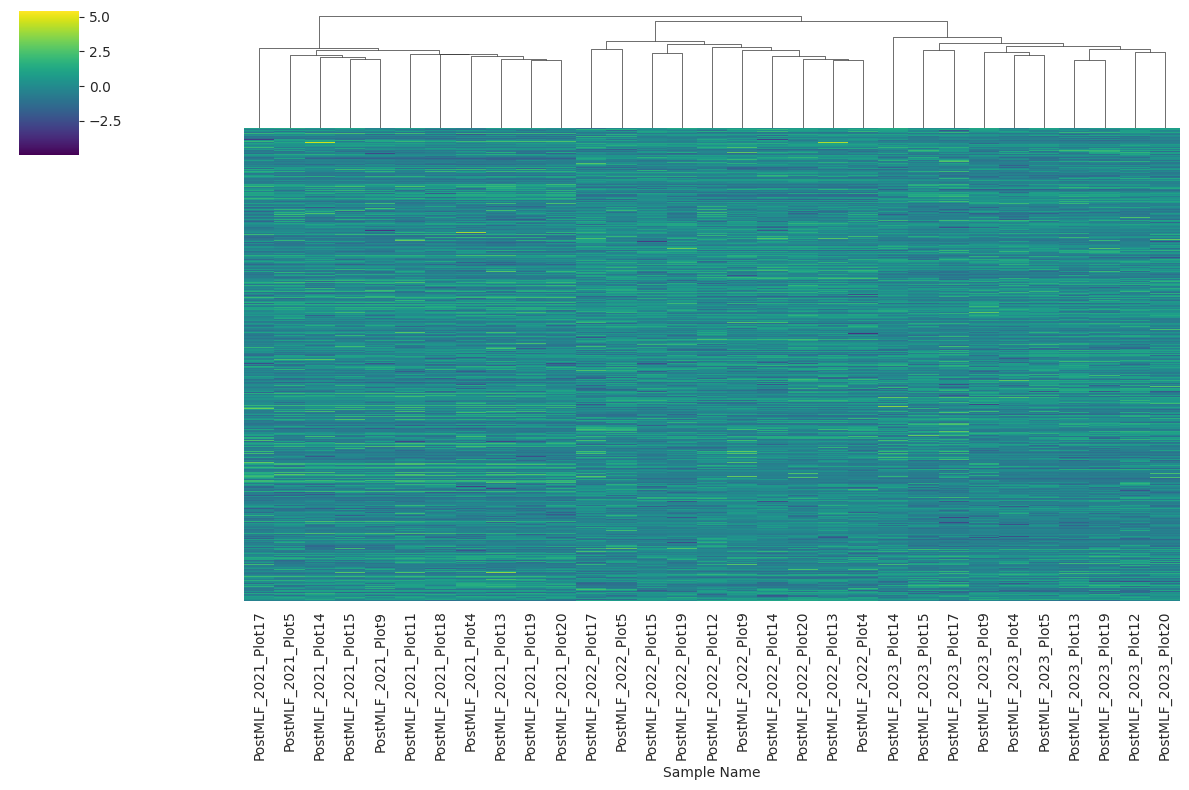

In [34]:
clustermap_df = postMLF_df.iloc[:, 3:].T

sns.clustermap(clustermap_df, cmap="viridis", col_cluster=True, row_cluster=False, xticklabels=True, yticklabels=False, figsize=(12, 8))
plt.show()

### PCA plot

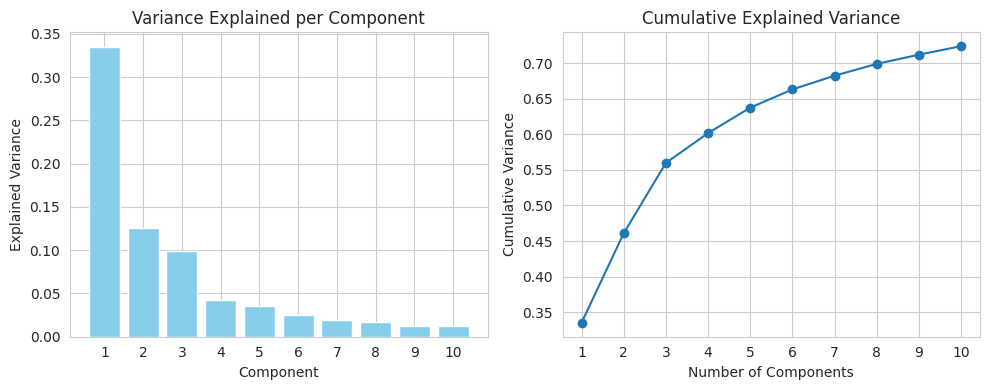

In [35]:
# Instantiate PCA with the max number of components to test
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA to your data
pca.fit(df_wMetadata_cleaned_collapsed.iloc[:, 3:])

# Create subplots for the explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot explained variance ratio (variance per component)
axes[0].bar(range(1, n_components + 1), pca.explained_variance_ratio_, color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Plot cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure the plots are displayed nicely
plt.tight_layout()
plt.show()

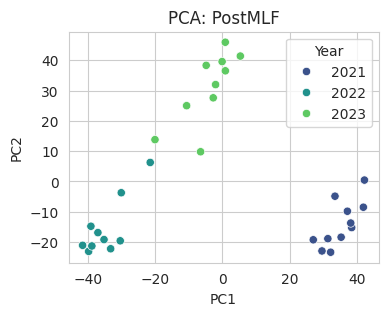

In [36]:
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(postMLF_df.iloc[:, 3:])

df_pca = postMLF_df[['sample_type', 'year', 'plot']].copy()
df_pca['PC1'], df_pca['PC2'] = pca_scores[:, 0], pca_scores[:, 1]

plt.figure(figsize=(4,3))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='year',  palette='viridis')
plt.title('PCA: PostMLF')
plt.legend(title='Year')
plt.show()
